# Filtering imagery with skimage

Inspiration: https://www.youtube.com/watch?v=pZATswy_IsQ

Today I am working through removing noise from numpy arrays (which could be imagery arrays). 

I start with simple pixel averaging then move onto convolutions. Convolutions can be applied in numpy and scipy, the latter providing more options for padding out the edges of the array. 

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import ndimage

local filtering is based on local averages of surrounding pixels

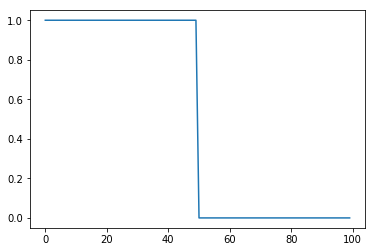

In [13]:
step_line = np.zeros(100)
step_line[:50] = 1
plt.plot(step_line);

add noise

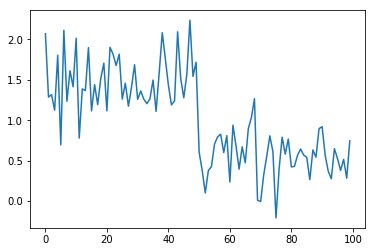

In [24]:
np.random.seed(1)
step_noisy = step_line + np.random.normal(loc=0.5, scale=0.35, size=step_line.shape); plt.plot(step_noisy);

The simplest way to filter out some of the noise is to take an average of the neighbouring pixels. 

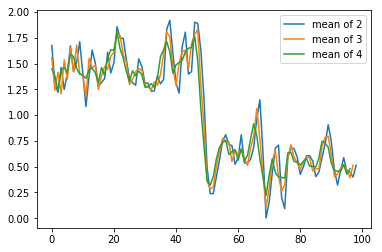

In [35]:
step_smooth2 = (step_noisy[:-1] + step_noisy[1:]) / 2.0
step_smooth3 = (step_noisy[:-2] + step_noisy[1:-1] + step_noisy[2:]) / 3.0
step_smooth4 = (step_noisy[:-3] + step_noisy[1:-2] + step_noisy[2:-1] + step_noisy[3:]) / 4.0
fig, ax = plt.subplots()
ax.plot(step_smooth2, label='mean of 2')
ax.plot(step_smooth3, label='mean of 3')
ax.plot(step_smooth4, label='mean of 4')
ax.legend();

The data is less noisy as the more averages are taken, but it gets complicated pretty quickly.

A better way is to use nearest-neighbor averages, which can be expressed as a convolution with an averaging kernel.

The kernel looks like this:  [0.33333333 0.33333333 0.33333333]
Convolved and neighbouring pixel average is the same:  True


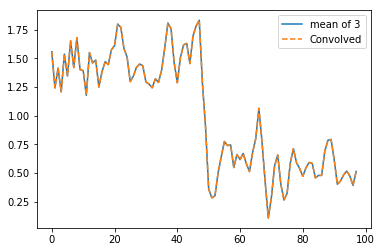

In [48]:
mean_kernel3 = np.full(3, 1/3); print('The kernel looks like this: ', mean_kernel3)
step_smooth3p = np.convolve(step_noisy, mean_kernel3, mode='valid'); 
fig, ax = plt.subplots()
ax.plot(step_smooth3, label='mean of 3')
ax.plot(step_smooth3p, linestyle='dashed', label='Convolved')
ax.legend()
ax.legend; print('Convolved and neighbouring pixel average is the same: ', 
                 np.allclose(step_smooth3, step_smooth3p))

Let's try it with another convolution!

The edges are a problem to consider. Why: The kernel does not go all the way to the edge when using the ```mode='valid'``` it stops short at 80(ish). To make it go to the end using ```mode=same``` will create a result the same dimensions but with a skewness toward 0 as the convolution is running out of values. 


Using scipys ```ndimage.convole``` default ```mode='reflect'``` extends the data to the edges. Check out: https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html and https://stackoverflow.com/questions/22669252/how-exactly-does-the-reflect-mode-for-scipys-ndimage-filters-work

The kernel (weights) looks like this:  [0.09090909 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909
 0.09090909 0.09090909 0.09090909 0.09090909 0.09090909]


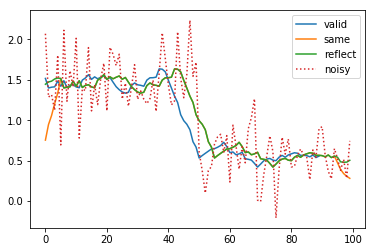

In [73]:
mean_kernel11 = np.full(11, 1/11); print('The kernel (weights) looks like this: ', mean_kernel11)
step_smooth11p = np.convolve(step_noisy, mean_kernel11, mode='valid')
step_smooth11s = np.convolve(step_noisy, mean_kernel11, mode='same')
step_smooth11n = ndimage.convolve(step_noisy, mean_kernel11, mode='reflect')
fig, ax = plt.subplots()
ax.plot(step_smooth11p, label='valid')
ax.plot(step_smooth11s, label='same')
ax.plot(step_smooth11n, label='reflect')
ax.plot(step_noisy, label='noisy', linestyle='dotted')
ax.legend();

### What is a convolution?

Wikipedia says: In mathematics (in particular, functional analysis) convolution is a mathematical operation on two functions (f and g) to produce a third function that expresses how the shape of one is modified by the other.

Tomorrow I would like to learn more of the theory of a convolution by reading this chapter: https://www.deeplearningbook.org/contents/convnets.html - focussing on Neural Networks. 

This is also a very nice blog: https://medium.freecodecamp.org/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050